In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [ ]:
pwd

In [12]:
X_train = pd.read_csv('train_images.csv')
y_train = pd.read_csv('train_labels.csv')

X_test = pd.read_csv('test_images.csv')
y_test = pd.read_csv('test_labels.csv')

In [13]:
X_train.head()

,95,101,99,103,95.1,86,96,89,70,104,...,111.214,107.329,92.354,89.258,103.379,99.414,117.112,116.103,118.82,96.423
0,91,92,91,89,92,93,96,101,107,104,...,103,92,93,95,98,105,104,100,90,81
1,87,70,72,74,84,78,93,104,106,106,...,84,71,95,102,94,80,91,80,84,90
2,0,0,0,0,0,0,0,0,0,0,...,94,81,89,84,80,90,92,80,88,96
3,114,118,124,119,95,118,105,116,123,112,...,116,113,102,93,109,104,106,117,111,115
4,79,95,90,82,73,74,77,75,82,87,...,90,80,79,78,65,71,62,97,89,73


In [14]:
X_train.shape, y_train.shape

((6999, 12100), (7000, 4))

In [15]:
X_test.shape, y_test.shape

((2733, 12100), (2734, 4))

In [16]:
y_train.head()

,Volcano?,Type,Radius,Number Volcanoes
0,1,3.0,17.46,1.0
1,0,NaN,NaN,NaN
2,0,NaN,NaN,NaN
3,0,NaN,NaN,NaN
4,0,NaN,NaN,NaN


So we have 6999 flatten images that contain 12100 pixels in train set and 2734 in the test set. 
But we have some big problem here. For train data, we have 6999 images but in labels, we have 7000 labels so there must be one missing image.

If we check above the X_train.head part we can see clearly that the column names are our missing image's pixels. The problem is the indexing of the X_train and X_test and we must reindex this

In [17]:
def XFix(X):
    X.loc[-1] = X.columns.values.astype(float).astype(int)  # adding column names as a new row
    X.index = X.index + 1  # shifting index
    X.sort_index(inplace=True)  # sorting the index
    
XFix(X_train)
XFix(X_test)

In [20]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((7000, 12100), (7000, 4), (2734, 12100), (2734, 4))

Text(0.5, 1.0, 'volcanoes in testing set')

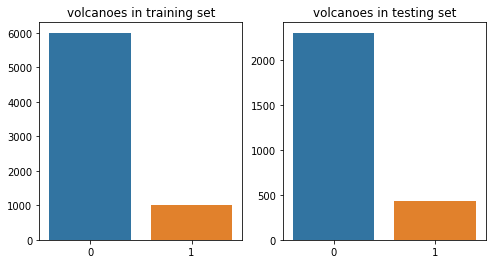

In [35]:
#Let us see how many images on the train and test set have volacanoes
train_counts =y_train['Volcano?'].value_counts()
test_counts = y_test['Volcano?'].value_counts()

plt.figure(figsize = (8,4))
plt.subplot(121)
sns.barplot(train_counts.index, train_counts.values)
plt.title('volcanoes in training set')
plt.subplot(122)
sns.barplot(test_counts.index, test_counts.values)
plt.title('volcanoes in testing set')

In [ ]:
Translate the 7000 images 1D to 2D

In [29]:
X_train_1 =  np.resize(X_train, (7000, 110, 110, 1))
X_test_1 = np.resize (X_test, (2734, 110, 110, 1))

Let us normalize the pixel values between 0 and 1

In [36]:
X_train_2= X_train_1/256
X_test_2 = X_test_1/256

In [ ]:
Lets prepare the image data to appropriate dimension, annd split the training data to train and validation data.

Building our neural network

In [42]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from keras.layers import LSTM, Input, TimeDistributed
from keras.models import Model
from keras.optimizers import RMSprop, SGD

#Import the backend
from keras import backend as K

In [43]:
model_dense = Sequential()

# Add dense layers to create a fully connected MLP
# Note that we specify an input shape for the first layer, but only the first layer.
# Relu is the activation function used
model_dense.add(Dense(128, activation='relu', input_shape=(110,110,1)))
# Dropout layers remove features and fight overfitting
model_dense.add(Dropout(0.1))
model_dense.add(Dense(64, activation='relu'))
model_dense.add(Dropout(0.1))
# End with a number of units equal to the number of classes we have for our outcome
model_dense.add(Dense(4, activation='softmax'))

model_dense.summary()

# Compile the model to put it all together.
model_dense.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(),
              metrics=['accuracy'])

history_dense = model_dense.fit(X_train_2, y_train,
                          batch_size=128,
                          epochs=10,
                          verbose=1,
                          validation_data=(X_test_2, y_test))
score = model_dense.evaluate(X_test_2, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 110, 110, 128)     256       
_________________________________________________________________
dropout_3 (Dropout)          (None, 110, 110, 128)     0         
_________________________________________________________________
dense_5 (Dense)              (None, 110, 110, 64)      8256      
_________________________________________________________________
dropout_4 (Dropout)          (None, 110, 110, 64)      0         
_________________________________________________________________
dense_6 (Dense)              (None, 110, 110, 4)       260       
Total params: 8,772
Trainable params: 8,772
Non-trainable params: 0
_________________________________________________________________


ValueError: Error when checking target: expected dense_6 to have 4 dimensions, but got array with shape (4900, 4)